In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

import xgboost as xgb
from xgboost import plot_importance

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv("../input/Admission_Predict_Ver1.1.csv")

In [3]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

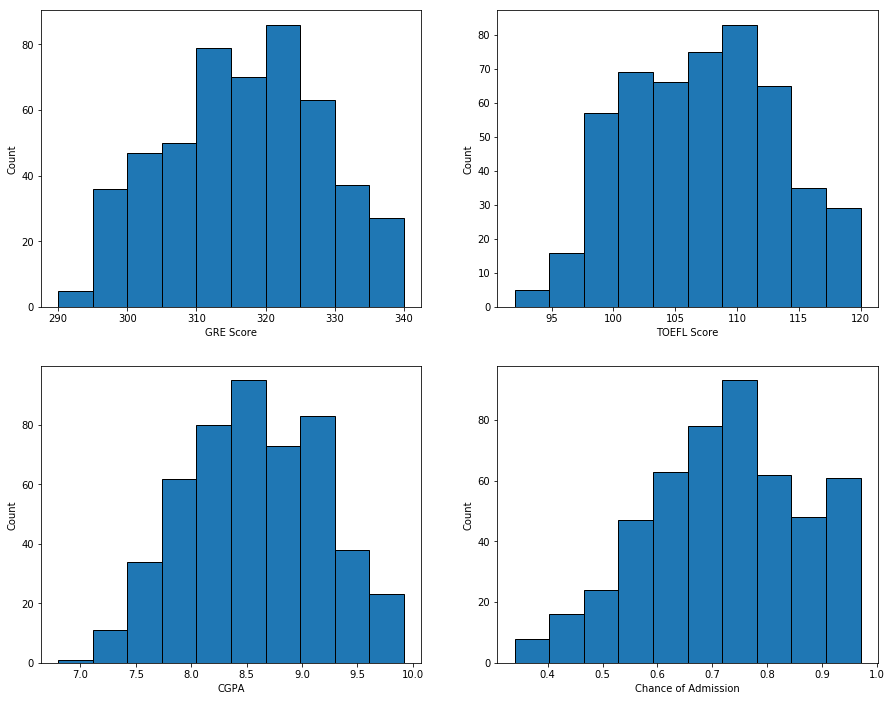

In [5]:
f, axarr = plt.subplots(2, 2, figsize=(15, 12))

plt.sca(axarr[0][0])
plt.hist(train['GRE Score'], edgecolor='black', linewidth=1);
plt.xlabel('GRE Score');
plt.ylabel('Count');

plt.sca(axarr[0][1])
plt.hist(train['TOEFL Score'], edgecolor='black', linewidth=1);
plt.xlabel('TOEFL Score');
plt.ylabel('Count');

plt.sca(axarr[1][0])
plt.hist(train['CGPA'], edgecolor='black', linewidth=1);
plt.xlabel('CGPA');
plt.ylabel('Count');

plt.sca(axarr[1][1])
plt.hist(train['Chance of Admit '], edgecolor='black', linewidth=1);
plt.xlabel('Chance of Admission');
plt.ylabel('Count');


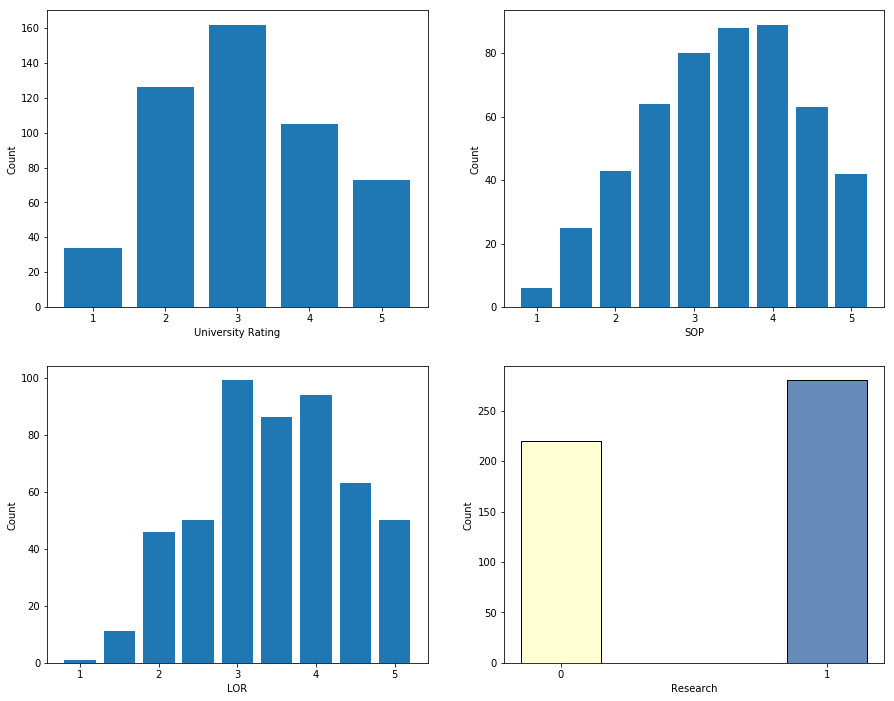

In [6]:
f, axarr = plt.subplots(2, 2, figsize=(15, 12))

plt.sca(axarr[0][0])
plt.bar(
    x=train['University Rating'].value_counts().sort_index().index, 
    height = train['University Rating'].value_counts().sort_index(),
)
plt.xlabel('University Rating');
plt.ylabel('Count');


plt.sca(axarr[0][1])
plt.bar(
    x=train['SOP'].value_counts().sort_index().index, 
    height = train['SOP'].value_counts().sort_index(),
    width = .4
)
plt.xlabel('SOP');
plt.ylabel('Count');


plt.sca(axarr[1][0])
plt.bar(
    x=train['LOR '].value_counts().sort_index().index, 
    height = train['LOR '].value_counts().sort_index(),
    width = .4
)
plt.xlabel('LOR');
plt.ylabel('Count');


plt.sca(axarr[1][1])
plt.bar(
    x=train['Research'].value_counts().sort_index().index, 
    height = train['Research'].value_counts().sort_index(),
    tick_label = [0,1],
    color = ['xkcd:eggshell', 'xkcd:faded blue'], 
    edgecolor = 'black',
    width = 0.3
)
plt.xlabel('Research');
plt.ylabel('Count');

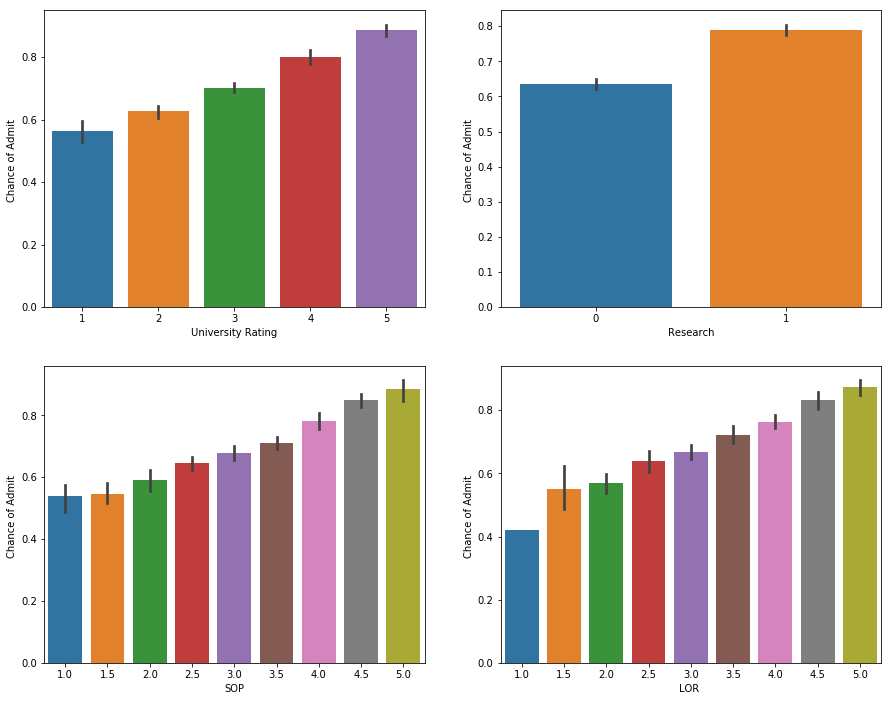

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 12))

sns.barplot(
    x=train['University Rating'], y=train['Chance of Admit '],
    ax=axarr[0][0]
);

sns.barplot(
    x=train['Research'], y=train['Chance of Admit '],
    ax=axarr[0][1]
);

sns.barplot(
    x=train['SOP'], y=train['Chance of Admit '],
    ax=axarr[1][0]
);

sns.barplot(
    x=train['LOR '], y=train['Chance of Admit '],
    ax=axarr[1][1]
);

In [8]:
bins_CGPA = pd.cut(train['CGPA'], [0,7.0,8.0,9.0,10.0])
bins_admit = pd.cut(train['Chance of Admit '], [0,.2,.4,.6,.8,1])

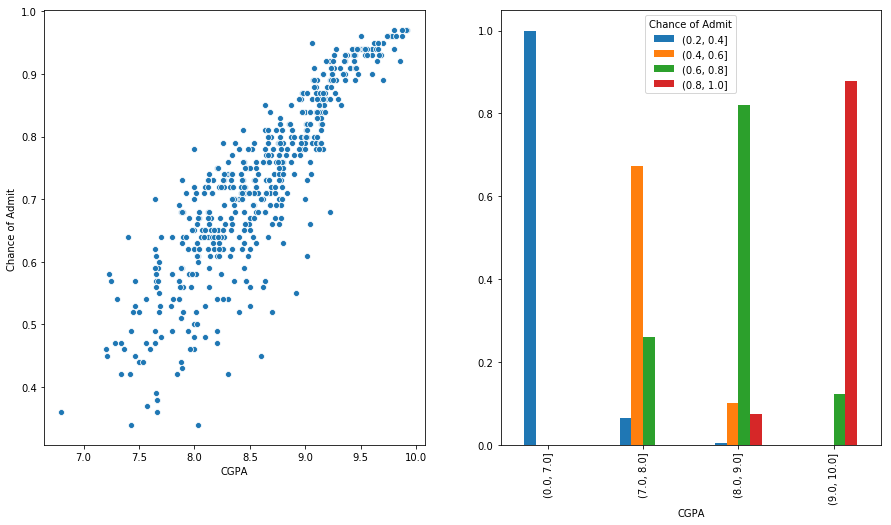

In [9]:
temp = pd.DataFrame({"CGPA":bins_CGPA, "Chance of Admit":bins_admit})

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(
    x='CGPA',
    y='Chance of Admit ',
    data=train,
    ax=ax[0]
);

temp.groupby('CGPA')['Chance of Admit'].value_counts(normalize=True).sort_index().unstack().plot(
    kind='bar',
    ax=ax[1]
);

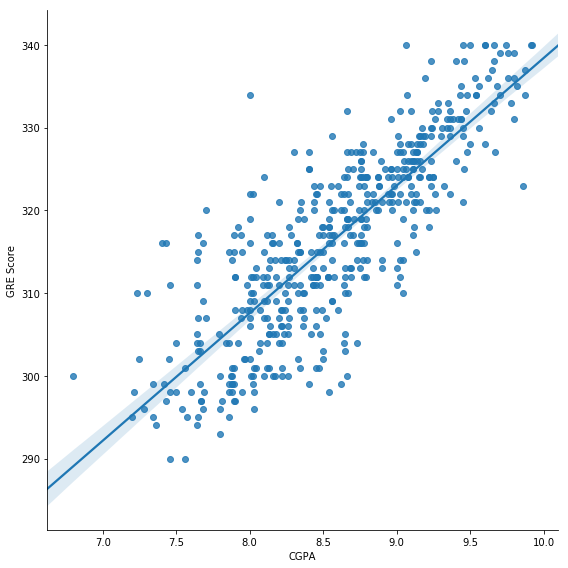

In [10]:
sns.lmplot(
    x='CGPA',
    y='GRE Score',
    data=train,
    height=8
);

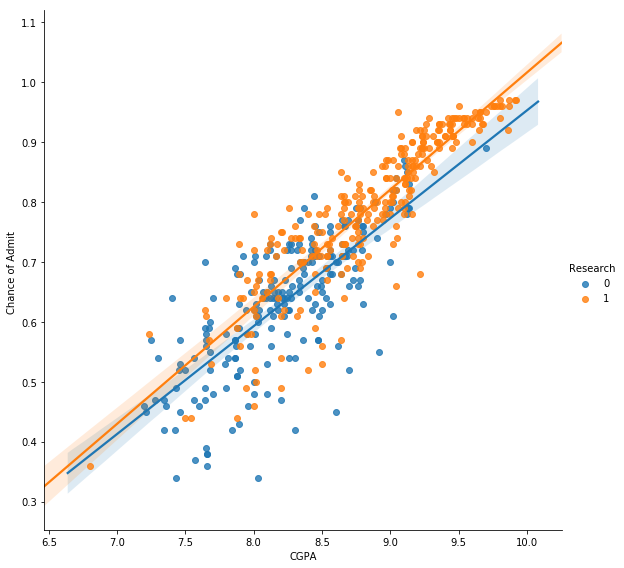

In [11]:
sns.lmplot(
    x='CGPA',
    y='Chance of Admit ',
    hue='Research',
    data=train,
    height=8
);

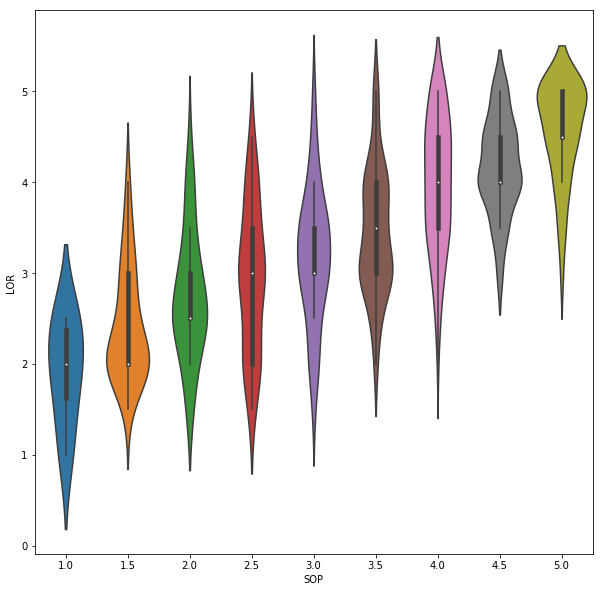

In [12]:
f,ax = plt.subplots(1,1,figsize=(10,10))
sns.violinplot(
    x='SOP',
    y='LOR ',
    data=train,
    ax=ax
);

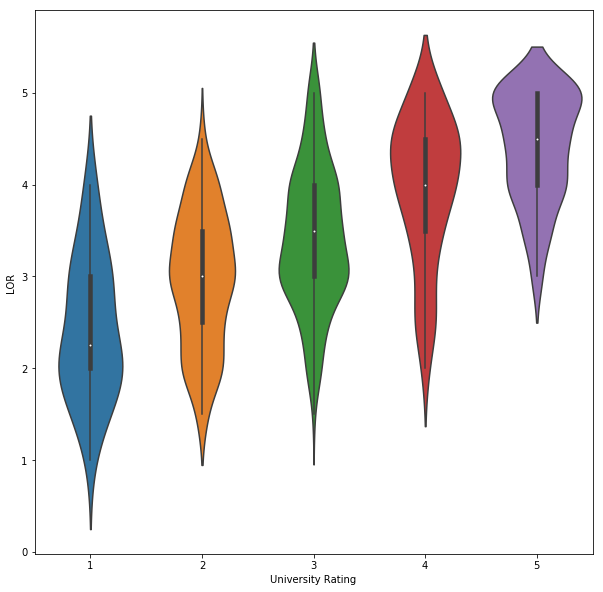

In [13]:
f,ax = plt.subplots(1,1,figsize=(10,10))
sns.violinplot(
    x='University Rating',
    y='LOR ',
    data=train,
    ax=ax
);

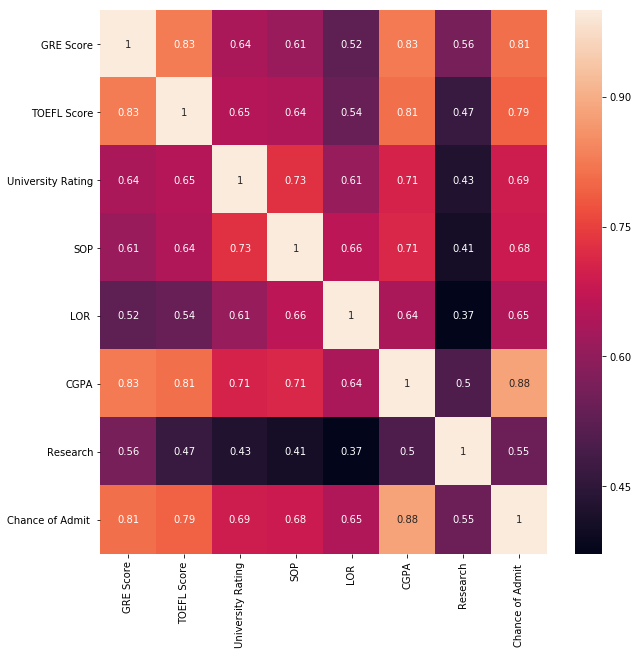

In [14]:
corr_mat = train.drop(['Serial No.'], axis=1).corr()

f,ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_mat, annot=True);

**MODEL TRAINING**

In [15]:
y = train['Chance of Admit ']
X = train.drop(['Serial No.', 'Chance of Admit '], axis=1)

X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
eval_set = [(X_test, y_test)]

**Linear Regression**

In [17]:
lr = LinearRegression().fit(X_train, y_train)

# R^2
lr.score(X_train, y_train)

0.8209843725364347

In [18]:
lr_test_preds = lr.predict(X_test)

test_mae = abs(lr_test_preds - y_test).mean()
test_mae

0.04397544240339193

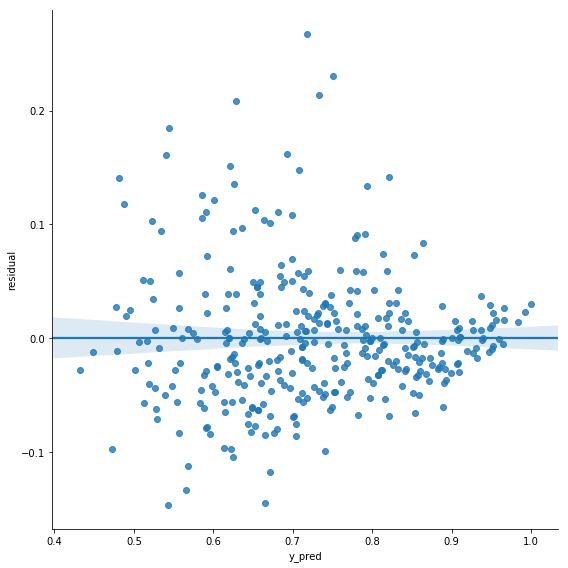

In [19]:
lr_train_preds = lr.predict(X_train)

temp = pd.DataFrame({'y_pred':lr_train_preds, 'residual':(lr_train_preds-y_train)})

#Residuals vs. fit plot
sns.lmplot(
    x='y_pred',
    y='residual',
    data=temp,
    height=8
);

Our residuals have relatively equal variances except for those with corresponding fitted values above 0.9. Of course, it would make sense that admissions would be less random/variable for those with top-notch metrics, and more chaotic for those in the middle of the pack, so some degree of heteroscedasticity should probably be expected. We also don't seem to have much bias in our predictions. All told, our linear model seems to be picking up the relationship between the response and predictors relatively well. This is also supported by the fact that our model has a solid R^2 of ~0.82, and a test MAE of approx. 0.04398, which is only slightly worse than the test MAE of our highly tuned XGBoost model (further below).

In [20]:
#perc_75 = X_train.quantile(.75)
#perc_25 = X_train.quantile(.25)

#num_strengths = 1*((X_train - perc_75) >= 0).sum(axis=1)
#num_weaknesses = 1*((X_train - perc_25) <= 0).sum(axis=1)

#X_train.loc[:,'Num Strengths'] = num_strengths
#X_train.loc[:,'Num Weaknesses'] = num_weaknesses

In [21]:
#f, ax = plt.subplots(1, 1, figsize=(15, 12))

#plt.sca(ax)
#plt.hist((lr_train_preds-y_train), edgecolor='black', linewidth=1);
#plt.xlabel('Residual');
#plt.ylabel('Count');

**PCA**

We'll first need to scale our data before computing our principal components:

In [22]:
scaler = StandardScaler().fit(X_train.astype(float))
X_train_scaled = scaler.transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

In [23]:
pca = PCA(n_components=7)
pca.fit(X_train_scaled)

print(pca.explained_variance_ratio_)

[0.67424249 0.11688661 0.07699206 0.05195529 0.03417096 0.02474026
 0.02101232]


In [24]:
#evr_cum[i] will contain the ratio of variance explained by the first i principal components
evr_cum = [0]
for i,num in enumerate(pca.explained_variance_ratio_):
    evr_cum.append(evr_cum[i] + pca.explained_variance_ratio_[i])

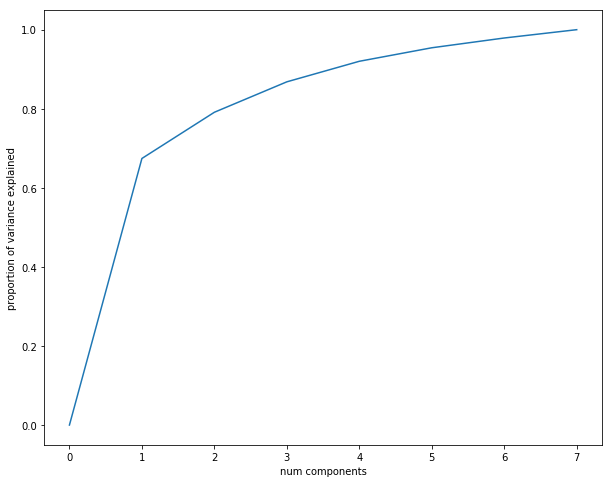

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
plt.plot(evr_cum)
plt.xlabel("num components")
plt.ylabel("proportion of variance explained")
plt.show()

In [26]:
pca.explained_variance_ratio_[:4].sum()

0.920076452171813

The first 4 principal components explain over 92% of the variation in the data. We'll just keep these four.

In [27]:
pca = PCA(n_components=4)
pca.fit(X_train_scaled)

X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

In [28]:
lr_pca = LinearRegression().fit(X_pca_train, y_train)

pca_train_preds = lr_pca.predict(X_pca_train)
pca_test_preds = lr_pca.predict(X_pca_test)

test_mae = abs(pca_test_preds - y_test).mean()
test_mae

0.04738926240687646

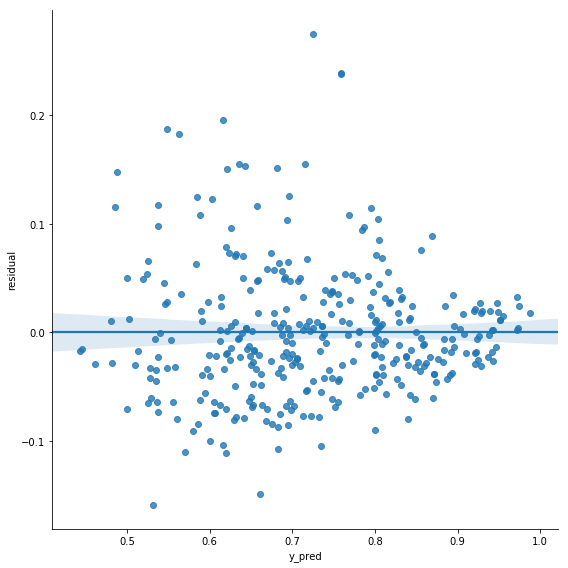

In [29]:
temp = pd.DataFrame({'y_pred':pca_train_preds, 'residual':(pca_train_preds-y_train)})

#Residuals vs. fit plot
sns.lmplot(
    x='y_pred',
    y='residual',
    data=temp,
    height=8
);

**Decision Tree**

In [30]:
param_grid = {
    'max_depth': [5],             #tested [2,3,4,5,6,7]
    'min_samples_leaf': [3],      #tested [1,2,3,4,5]
}

tree_reg = DecisionTreeRegressor(
    criterion='mae',
    random_state=1)

cv_tree = GridSearchCV(
    estimator=tree_reg, 
    param_grid=param_grid, 
    n_jobs=-1, 
    cv=5, 
    scoring=make_scorer(mean_absolute_error, greater_is_better=False))

cv_tree.fit(X_train, y_train)

best_tree = cv_tree.best_estimator_
print(cv_tree.best_score_, cv_tree.best_params_)

-0.050657142857142845 {'max_depth': 5, 'min_samples_leaf': 3}


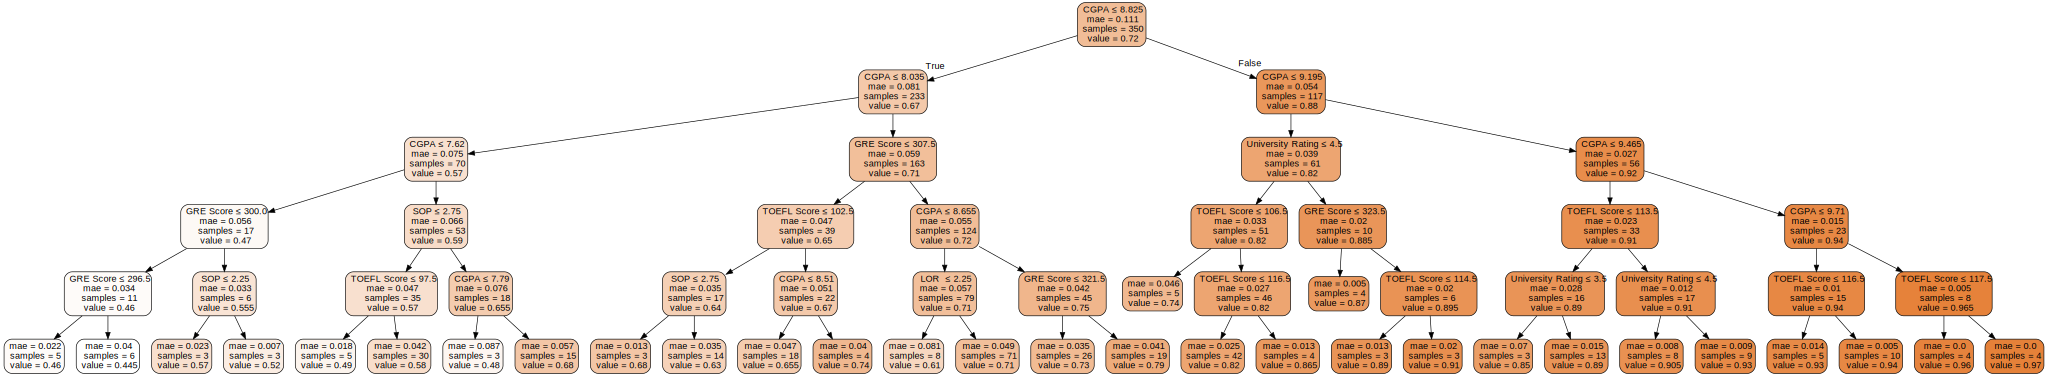

In [31]:
dot_data = tree.export_graphviz(best_tree, out_file=None,
                              feature_names=X_train.columns,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [32]:
dt_train_preds = best_tree.predict(X_train)

dt_test_preds = best_tree.predict(X_test)

test_mae = abs(dt_test_preds - y_test).mean()
test_mae

0.05099999999999996

**Random Forest**

In [33]:
param_grid = {
    'n_estimators':[350],    #tested [10,20,50,100,200,250,300,350,400]
    'max_depth': [6],               #tested [2,3,4,5,6,7,8]
    'min_samples_leaf': [1],        #tested [1,2,3,4,5]
    'max_features':['sqrt']         #tested ['auto','sqrt']
}

rf_reg = RandomForestRegressor(
    criterion='mae',
    random_state=1)

cv_rf = GridSearchCV(
    estimator=rf_reg, 
    param_grid=param_grid, 
    n_jobs=-1, 
    cv=5, 
    scoring=make_scorer(mean_absolute_error, greater_is_better=False))

cv_rf.fit(X_train, y_train)

best_rf = cv_rf.best_estimator_
print(cv_rf.best_score_, cv_rf.best_params_)

-0.04358991836734692 {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350}


Optimal parameters for random forest: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350}

Produces 5-fold CV MAE of  0.04358991836734692 

In [34]:
rf_train_preds = best_rf.predict(X_train)

rf_test_preds = best_rf.predict(X_test)

test_mae = abs(rf_test_preds - y_test).mean()
test_mae

0.04623390476190477

**XGBoost**

In [35]:
param_grid = {
    'learning_rate': [.25],   #tested [.01,.05,.1,.25,.5]
    'n_estimators': [20],      #tested [10,20,30,50,100]
    'max_depth': [2],             #tested [2,3,4,5,6,7]
    'min_child_weight': [2],      #tested [1,2,3,4,5,6,7,8]
    'subsample': [1],       #tested [.4,.6,.8,.85,.9,.95,1]
    'colsample_bytree':[1],    #tested [.4,.6,.8,.85,.9,.95,1]
}

xgb_reg = xgb.XGBRegressor(random_state=1)

cv_xgb = GridSearchCV(estimator = xgb_reg, param_grid = param_grid, 
                      n_jobs = -1, cv = 5, 
                      scoring=make_scorer(mean_absolute_error, greater_is_better=False))
cv_xgb.fit(X_train,y_train)

best_xgb = cv_xgb.best_estimator_
print(cv_xgb.best_score_, cv_xgb.best_params_)

-0.044277648769106184 {'colsample_bytree': 1, 'learning_rate': 0.25, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 20, 'subsample': 1}


In [36]:
xgb1 = xgb.XGBRegressor(
 learning_rate = 0.05,
 n_estimators=500,
 max_depth=2,
 min_child_weight=2,
 subsample=1,
 colsample_bytree=1,
 seed=1)

xgb1.fit(X_train, y_train, 
         early_stopping_rounds = 20, 
         eval_set = eval_set, 
         eval_metric='mae', 
         verbose=False)

print("Optimal boosting rounds: {} \nMAE: {}".format(xgb1.get_booster().best_ntree_limit, xgb1.get_booster().best_score))

Optimal boosting rounds: 174 
MAE: 0.043684


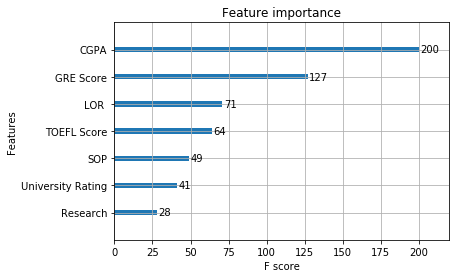

In [37]:
plot_importance(xgb1)

In [38]:
xgb_train_preds = xgb1.predict(X_train)

xgb_test_preds = xgb1.predict(X_test)

test_mae = abs(xgb_test_preds - y_test).mean()
test_mae

0.043684283908208194

**ENSEMBLE MODEL**

In [39]:
model_train_preds = pd.DataFrame({'lr_preds':lr_train_preds, 
                                  'pca_preds':pca_train_preds, 
                                  'dt_preds':dt_train_preds, 
                                  'rf_preds':rf_train_preds, 
                                  'xgb_preds': xgb_train_preds})

model_test_preds = pd.DataFrame({'lr_preds':lr_test_preds, 
                                  'pca_preds':pca_test_preds, 
                                  'dt_preds':dt_test_preds, 
                                  'rf_preds':rf_test_preds, 
                                  'xgb_preds': xgb_test_preds})

In [40]:
model_train_preds.head(n=10)

,lr_preds,pca_preds,dt_preds,rf_preds,xgb_preds
0,0.658568,0.683483,0.680,0.658143,0.650680
1,0.621319,0.620801,0.630,0.612671,0.609811
2,0.868163,0.875825,0.905,0.891357,0.886460
3,0.591139,0.634855,0.480,0.579229,0.574803
4,0.782720,0.804691,0.710,0.776286,0.781329
5,0.780776,0.793809,0.790,0.761514,0.756355
6,0.791414,0.804041,0.790,0.755143,0.758601
7,0.845290,0.837190,0.820,0.842743,0.864884
8,0.900161,0.919704,0.905,0.910843,0.918704
9,0.560193,0.537410,0.580,0.561343,0.557506


In [41]:
model_train_preds.corr()

,lr_preds,pca_preds,dt_preds,rf_preds,xgb_preds
lr_preds,1.000000,0.991763,0.959125,0.985732,0.987639
pca_preds,0.991763,1.000000,0.945445,0.981783,0.979555
dt_preds,0.959125,0.945445,1.000000,0.970692,0.966537
rf_preds,0.985732,0.981783,0.970692,1.000000,0.994274
xgb_preds,0.987639,0.979555,0.966537,0.994274,1.000000


In [42]:
train_mae = abs(model_train_preds.mean(axis=1) - y_train.values).mean()
train_mae

0.035303959502076154

In [43]:
test_mae = abs(model_test_preds.mean(axis=1) - y_test.values).mean()
test_mae

0.04309587370748982